# Integration using Monte Carlo 
                                  - Rahul M N (PH17B009) 

In [1]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

$f_{ave} = \frac{1}{b-a} \int_{a}^{b}f(x)dx$

Steps 
1. Get a random input value from the integration range
2. Evaluate the integrand
3. Repeat Steps 1 and 2 for as long as you like
4. Determine the average of all these samples and multiple by the range


In [2]:
def get_rand_number(min_value, max_value):
    
    #This functions gets a random number from a uniform distribution between
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

$f(x) = \frac{1}{1+x^2}$

In [3]:
def f_of_x(x):
    #This is the function we want to integrate
    
    return ((1/(1+x**2)))

In [4]:
def crude_monte_carlo(num_samples):
    """
    This function performs the Crude Monte Carlo for our
    function f(x) on the range x=0 to x=1.       
    """
    lower_bound = 0
    upper_bound = 1
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)


In [5]:
def get_crude_MC_variance(num_samples):
    """
    This function returns the variance fo the Crude Monte Carlo.
    """
    int_max = 1 # this is the max of our integration range
    
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = running_total*int_max / num_samples
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave

In [6]:
#Sample Result

MC_samples = 1000
var_samples = 1000 # number of samples we will use to calculate the variance
crude_estimation = crude_monte_carlo(MC_samples)
variance = get_crude_MC_variance(var_samples)
error = math.sqrt(variance/MC_samples)

# display results
print(f"Monte Carlo Approximation of f(x): {crude_estimation}")
print(f"Variance of Approximation: {variance}")
print(f"Error in Approximation: {error}")


Monte Carlo Approximation of f(x): 0.7879786599389724
Variance of Approximation: 0.6495858687166448
Error in Approximation: 0.025486974491230708


In [7]:
#Analytical Solution is Pi/4 
math.pi/4

0.7853981633974483

In [8]:
print(f"N \t Monte Carlo Approximation of f(x): \t\t","Variance  \t\t","Error ")
for i in range(1000, 1020000,50000 ):
    crude_estimation = crude_monte_carlo(i)
    variance = get_crude_MC_variance(i)
    error = math.sqrt(variance/i)
   
    print(f"{i}\t {crude_estimation} \t\t\t {variance}\t\t\t {error}  ")
   

N 	 Monte Carlo Approximation of f(x): 		 Variance  		 Error 
1000	 0.7851073099177962 			 0.6426339839798721			 0.025350226507466794  
51000	 0.7860529882259628 			 0.6418040245936101			 0.0035474487507348705  
101000	 0.7846323081725936 			 0.6431515415280852			 0.002523457359424273  
151000	 0.7858361688670307 			 0.6424272278096668			 0.0020626402867155243  
201000	 0.7855042825849012 			 0.6422216302214041			 0.0017874933534600072  
251000	 0.7855109578147476 			 0.6426016101278161			 0.0016000518045993567  
301000	 0.7857757379113249 			 0.6435491322984593			 0.0014622027849721336  
351000	 0.7849588183219953 			 0.6422283212948643			 0.0013526678517209558  
401000	 0.7849850397278667 			 0.6431570898200867			 0.0012664450311828373  
451000	 0.7855440801199564 			 0.6426240656088102			 0.0011936863337720547  
501000	 0.785290041289857 			 0.6427502306113173			 0.0011326670261107444  
551000	 0.7852025220221148 			 0.6425792028395869			 0.0010799099267066736  
601000	 0.7855827483

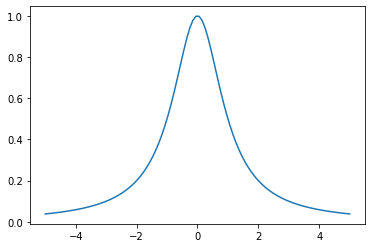

In [9]:
x=np.setdiff1d(np.linspace(-5,5,100),[0]) #to remove the zero
y=f_of_x(x)
plt.plot(x, y)
plt.show()

# With Weight Function

$w(x)=\frac{4-2x}{3}$

In [10]:
# this is our weight function g(x)
def g_x(x):
    return((4-2*x)/3) 


$g(x) = 2-\sqrt(4-3y)$

In [11]:
def g_i(y):
    return (float(2-math.sqrt(4-3*y)))

In [12]:
def wmc(n):
    lower_bound = 0
    upper_bound = 1
    y=[]
    for i in range(n):
        t=get_rand_number(0, 1)  
        y.append(t)
    x=list(map(g_i,y))
    sum_of_samples = 0
    for i in range(n):
        #x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x[i])/g_x(x[i])
    
    return (upper_bound - lower_bound) * float(sum_of_samples/n)


In [13]:
print(f"N \tWeighted Monte Carlo Integration of f(x): \t\t","Variance  \t\t\t","Error ")
for i in range(1000, 1020000,50000 ):
    c_e = wmc(i)
    variance = get_crude_MC_variance(i)
    error = math.sqrt(variance/i)
   
    print(f"{i}\t {c_e} \t\t\t\t {variance}\t\t {error}  ")

N 	Weighted Monte Carlo Integration of f(x): 		 Variance  			 Error 
1000	 0.7855841433243886 				 0.6369438084105608		 0.02523774570777986  
51000	 0.7855032594231864 				 0.6425929446626903		 0.0035496283833737793  
101000	 0.7853478859873843 				 0.6424384257274347		 0.0025220579875075907  
151000	 0.7853476276406093 				 0.6429599004218532		 0.002063495235171428  
201000	 0.7853899409006105 				 0.6434150654566168		 0.001789153424778351  
251000	 0.7854352681564201 				 0.6427621996530894		 0.0016002517227946137  
301000	 0.7853980906310412 				 0.642040525173961		 0.0014604879323629975  
351000	 0.7853772428085478 				 0.6423637248627574		 0.0013528104383948544  
401000	 0.7854100382621909 				 0.6426394696086392		 0.0012659353038515647  
451000	 0.7854308393378034 				 0.6431712009559585		 0.0011941943827740657  
501000	 0.7854313902327814 				 0.6421475422551088		 0.0011321358669645982  
551000	 0.7853736066650315 				 0.6426096969395612		 0.001079935550388892  
601000	 0.785389